<div align="center">

  <a href="https://ultralytics.com/yolo" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>

  [中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [Türkçe](https://docs.ultralytics.com/tr/) | [Tiếng Việt](https://docs.ultralytics.com/vi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml"><img src="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml/badge.svg" alt="Ultralytics CI"></a>
  <a href="https://colab.research.google.com/github/ultralytics/notebooks/blob/main/notebooks/how-to-train-ultralytics-yolo-on-crack-segmentation-dataset.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>


  <a href="https://ultralytics.com/discord"><img alt="Discord" src="https://img.shields.io/discord/1089800235347353640?logo=discord&logoColor=white&label=Discord&color=blue"></a>
  <a href="https://community.ultralytics.com"><img alt="Ultralytics Forums" src="https://img.shields.io/discourse/users?server=https%3A%2F%2Fcommunity.ultralytics.com&logo=discourse&label=Forums&color=blue"></a>
  <a href="https://reddit.com/r/ultralytics"><img alt="Ultralytics Reddit" src="https://img.shields.io/reddit/subreddit-subscribers/ultralytics?style=flat&logo=reddit&logoColor=white&label=Reddit&color=blue"></a>
  
  Welcome to the Crack segmentation with Ultralytics YOLO11 🚀 notebook! <a href="https://github.com/ultralytics/ultralytics">YOLO11</a> is the latest version of the YOLO (You Only Look Once) AI models developed by <a href="https://ultralytics.com">Ultralytics</a>. We hope that the resources in this notebook will help you get the most out of YOLO11. Please browse the YOLO11 <a href="https://docs.ultralytics.com/">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/ultralytics">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!</div>

# Crack Segmentation using Ultralytics YOLO11

This notebook acts as a starting point for training the YOLO11 model using the [crack segmentation dataset](https://docs.ultralytics.com/datasets/segment/crack-seg/).

## Dataset Structure

The division of data within the Crack Segmentation Dataset is outlined as follows:

- **Training set**: Consists of 3717 images with corresponding annotations.

- **Testing set**: Comprises 112 images along with their respective annotations.

- **Validation set**: Includes 200 images with their corresponding annotations.

## Applications

Crack segmentation finds practical applications in infrastructure maintenance, aiding in the identification and assessment of structural damage. It also plays a crucial role in enhancing road safety by enabling automated systems to detect and address pavement cracks for timely repairs.


## Setup

pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

[![PyPI - Version](https://img.shields.io/pypi/v/ultralytics?logo=pypi&logoColor=white)](https://pypi.org/project/ultralytics/) [![Downloads](https://static.pepy.tech/badge/ultralytics)](https://www.pepy.tech/projects/ultralytics) [![PyPI - Python Version](https://img.shields.io/pypi/pyversions/ultralytics?logo=python&logoColor=gold)](https://pypi.org/project/ultralytics/)

In [12]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


## Dataset YAML File

A YAML (Yet Another Markup Language) file defines the dataset configuration, including paths, classes, and other pertinent details. 😀

```yaml
# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license

# Crack-seg dataset by Ultralytics
# Documentation: https://docs.ultralytics.com/datasets/segment/crack-seg/
# Example usage: yolo train data=crack-seg.yaml
# parent
# ├── ultralytics
# └── datasets
#     └── crack-seg  ← downloads here (91.2 MB)

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/crack-seg # dataset root dir
train: train/images # train images (relative to 'path') 3717 images
val: valid/images # val images (relative to 'path') 112 images
test: test/images # test images (relative to 'path') 200 images

# Classes
names:
  0: crack

# Download script/URL (optional)
download: https://github.com/ultralytics/assets/releases/download/v0.0.0/crack-seg.zip
```

## Train

Train YOLO11 on [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLO11 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="crack-seg.yaml", epochs=3, imgsz=640, batch=64, workers=64)

100%|██████████| 5.90M/5.90M [00:00<00:00, 99.5MB/s]


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=crack-seg.yaml, epochs=3, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=64, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

100%|██████████| 91.1M/91.1M [00:02<00:00, 40.2MB/s]
Unzipping /content/datasets/crack-seg.zip to /content/datasets/crack-seg...: 100%|██████████| 8061/8061 [00:01<00:00, 4783.99file/s]

Dataset download success ✅ (5.0s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 41.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 123MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/crack-seg/train/labels... 3717 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3717/3717 [00:03<00:00, 1105.57it/s]


train: New cache created: /content/datasets/crack-seg/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.3 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/crack-seg/valid/labels... 200 images, 1 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 706.43it/s]


val: New cache created: /content/datasets/crack-seg/valid/labels.cache
Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/3      11.3G      1.349        2.3      2.286      1.316         15        640: 100%|██████████| 59/59 [01:34<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.14s/it]

                   all        200        249      0.405      0.437      0.361      0.129      0.293      0.317      0.208     0.0421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/3      11.3G      1.221      1.656      1.575      1.213          5        640: 100%|██████████| 59/59 [01:28<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.37s/it]

                   all        200        249      0.484       0.47      0.372      0.162      0.426      0.402      0.247     0.0643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/3      11.5G      1.155      1.627      1.323      1.185         11        640: 100%|██████████| 59/59 [01:27<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.41s/it]

                   all        200        249      0.386      0.481      0.369      0.141      0.267      0.333      0.156     0.0343



3 epochs completed in 0.083 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.0MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.02s/it]


                   all        200        249      0.485      0.476      0.371      0.161       0.42      0.398      0.243     0.0637
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/segment/train


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto-cjk is already the newest version (1:20220127+repack1-1).
0 upgraded, 0 newly installed, 0 to remove and 93 not upgraded.
Found existing installation: mediapipe 0.10.21
Uninstalling mediapipe-0.10.21:
  Successfully uninstalled mediapipe-0.10.21
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultraly

Saving godjungF.png to godjungF.png


100%|██████████| 88.1M/88.1M [00:00<00:00, 267MB/s]


{'어깨 너비': '어깨 너비: 38.0cm', '팔 길이': '팔 길이: 29.1cm', '다리 길이': '다리 길이: 86.3cm', '다리 길이 차이': '1.5cm 왼쪽이 짧음'}

image 1/1 /content/godjungF.png: 320x640 1 person, 1 tie, 1 suitcase, 1 bed, 65.7ms
Speed: 7.4ms preprocess, 65.7ms inference, 458.9ms postprocess per image at shape (1, 3, 320, 640)
Detected class ID: 0.0 with confidence 0.8708379864692688


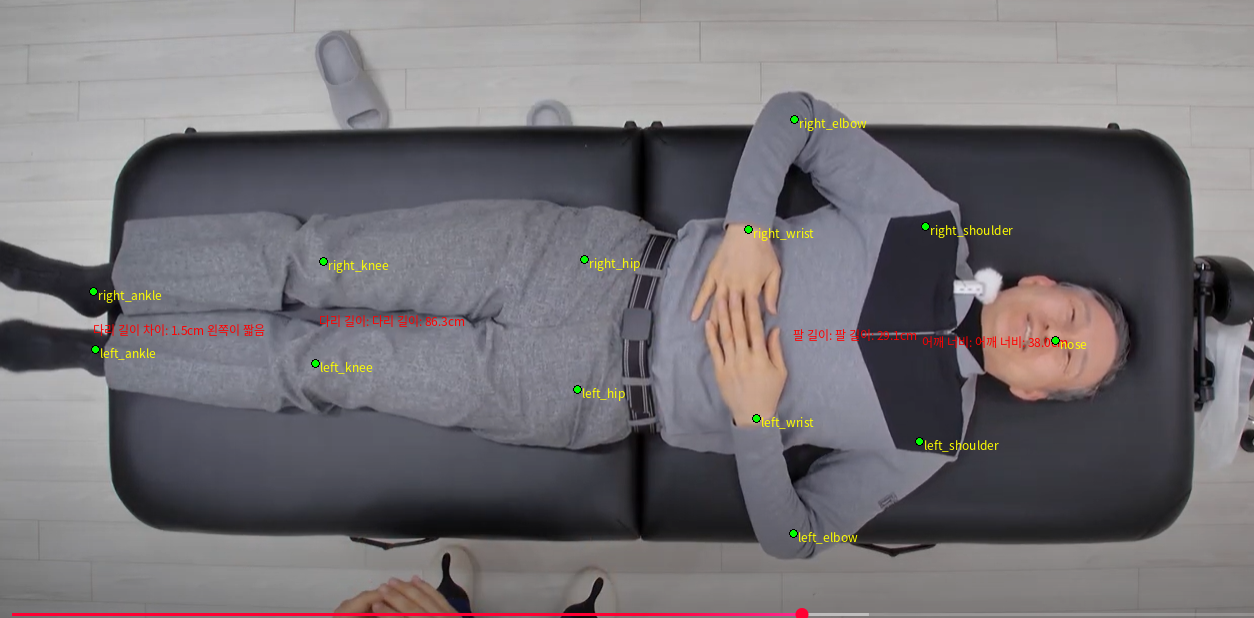

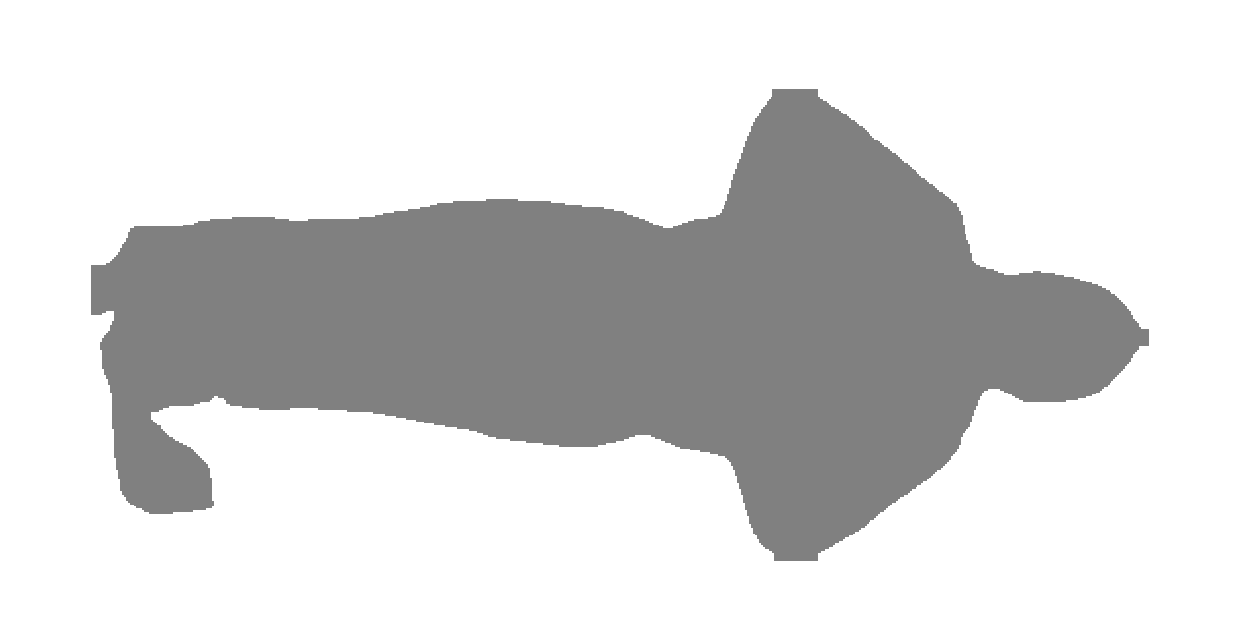

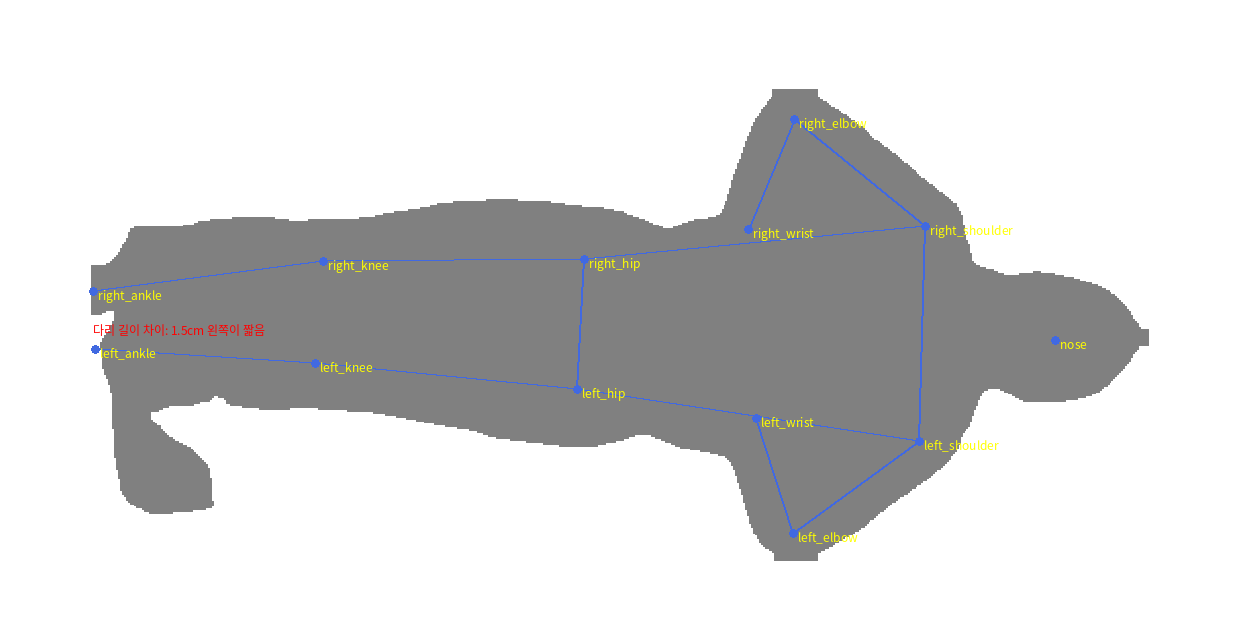

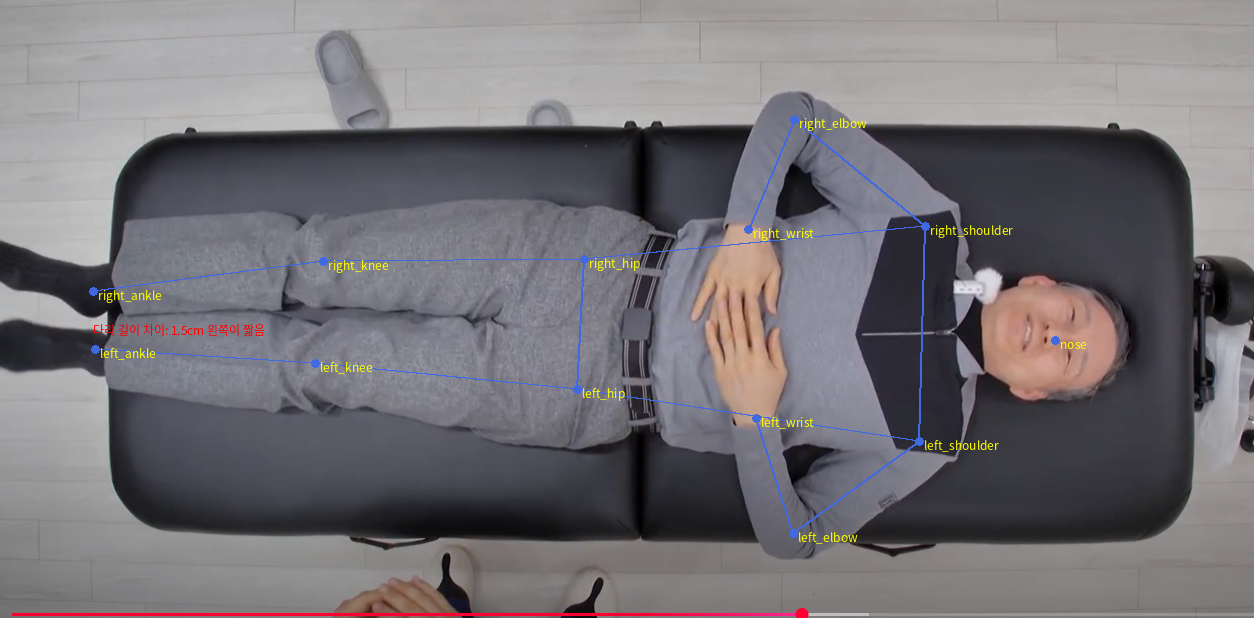

In [1]:
#yolo11n-seg.pt 적용 segment 보다 8l-seg가호
#jungB 오른쪽 발목점 찾음 109라인 임계치 0.5 -> 0.4로 낮춤춤
#다리길이 차이없음 156라인에서 표시기준이 1.0cm -> 0.5cm로 설정
# 다리길이차이: 2cm오른쪽이 짧다
# ─── 설치 및 임포트 ─────────────────────────────────────
!pip install -q ultralytics
!apt-get update -qq
!apt-get install -y fonts-noto-cjk
!pip uninstall -y mediapipe==0.10.0
#!pip install -q mediapipe==0.10.0
!pip install -q mediapipe
!apt-get update -qq


import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont, ImageOps
import torch
import math
import os
import mediapipe as mp
from google.colab import files
from IPython.display import Image as IPImage, display
from ultralytics import YOLO
from scipy.spatial.distance import euclidean
# ─── 환경 설정 ─────────────────────────────────────
FONT_PATH = "/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc"
output_user_path = "/content/annotated_user.png"
segmented_user_path = "/content/segmented_user.png"
keypoints_on_shadow_path = "/content/keypoints_on_shadow_user.png"
skeleton_on_user_path = "/content/skeleton_on_user.png"
# ─── 이미지 업로드 ─────────────────────────────────────
print("🔼 사용자 전신 이미지 업로드")
uploaded_user = files.upload()
user_image_path = next(iter(uploaded_user))
# ─── YOLOv8 기반 사람 세그멘테이션 ─────────────────────────────────────
from ultralytics import YOLO
import torchvision.transforms as T
model = YOLO('yolov8l-seg.pt')
transform = T.Compose([
    T.Resize((640, 640)),
    T.ToTensor()
])
#crop 방식
# ─── YOLOv8 기반 사람 세그멘테이션 (gray shadow 배경) ─────────────────────────────────────
def segment_person_yolo(input_image_path, output_path):
    model = YOLO('yolov8l-seg.pt')  #yolov8n-seg.pt yolov8m-seg.pt yolov8l-seg.pt
    results = model(input_image_path)[0]
    img = cv2.imread(input_image_path)
    h, w, _ = img.shape
    found_person = False
    found_other_objects = False
    for i, cls in enumerate(results.boxes.cls):
        print(f"Detected class ID: {cls.item()} with confidence {results.boxes.conf[i].item()}")
        if int(cls.item()) == 0:  # Class 0: person
            found_person = True
            mask = results.masks.data[i].cpu().numpy()
            mask = (mask * 255).astype(np.uint8)
            mask_resized = cv2.resize(mask, (w, h), interpolation=cv2.INTER_NEAREST)
            gray_foreground = np.ones_like(img, dtype=np.uint8) * 128
            white_background = np.ones_like(img, dtype=np.uint8) * 255
            mask_3c = np.stack([mask_resized / 255.0]*3, axis=-1)
            result_np = (gray_foreground * mask_3c + white_background * (1 - mask_3c)).astype(np.uint8)
            result_img = Image.fromarray(result_np)
            result_img.save(output_path)
            return result_img
        else:
            found_other_objects = True
    if found_person:
        raise ValueError("사람 객체를 찾을 수 없습니다.")
    elif found_other_objects:
        print("Other objects detected but no person found.")
        return None
    else:
        print("No objects detected.")
        return None
# ─── 거리 계산 ─────────────────────────────────────
def euclidean(p1, p2):
    return math.hypot(p1[0] - p2[0], p1[1] - p2[1])
# ─── 키포인트 추출 및 측정 ─────────────────────────────────────
import cv2
import mediapipe as mp
from scipy.spatial.distance import euclidean
def extract_keypoints_and_measurements(image_path):
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(static_image_mode=True, model_complexity=2)
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"이미지 로딩 실패: {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose.process(img_rgb)
    if not results.pose_landmarks:
        raise ValueError("❗ 키포인트를 찾을 수 없습니다.")
    h, w = img.shape[:2]
    lm = results.pose_landmarks.landmark
    def get_coords(idx, threshold=0.4):
        p = lm[idx]
        if p.visibility < threshold:
            return None
        return int(p.x * w), int(p.y * h)
    pts = {
        'nose': get_coords(mp_pose.PoseLandmark.NOSE.value),
        'left_shoulder': get_coords(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
        'right_shoulder': get_coords(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
        'left_elbow': get_coords(mp_pose.PoseLandmark.LEFT_ELBOW.value),
        'right_elbow': get_coords(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
        'left_wrist': get_coords(mp_pose.PoseLandmark.LEFT_WRIST.value),
        'right_wrist': get_coords(mp_pose.PoseLandmark.RIGHT_WRIST.value),
        'left_hip': get_coords(mp_pose.PoseLandmark.LEFT_HIP.value),
        'right_hip': get_coords(mp_pose.PoseLandmark.RIGHT_HIP.value),
        'left_knee': get_coords(mp_pose.PoseLandmark.LEFT_KNEE.value),
        'right_knee': get_coords(mp_pose.PoseLandmark.RIGHT_KNEE.value),
        'left_ankle': get_coords(mp_pose.PoseLandmark.LEFT_ANKLE.value),
        'right_ankle': get_coords(mp_pose.PoseLandmark.RIGHT_ANKLE.value),
    }
    def safe_euclidean(p1, p2):
        if p1 is None or p2 is None:
            return None
        return euclidean(p1, p2)
    shoulder_width = safe_euclidean(pts['left_shoulder'], pts['right_shoulder'])
    arm_length = safe_euclidean(pts['left_shoulder'], pts['left_wrist'])
    left_leg = safe_euclidean(pts['left_hip'], pts['left_ankle'])
    right_leg = safe_euclidean(pts['right_hip'], pts['right_ankle'])
    if pts['nose'] is not None and pts['left_ankle'] is not None and pts['right_ankle'] is not None:
        ankle_avg = (
            (pts['left_ankle'][0] + pts['right_ankle'][0]) // 2,
            (pts['left_ankle'][1] + pts['right_ankle'][1]) // 2
        )
        total_height = euclidean(pts['nose'], ankle_avg)
        scale = 170 / total_height if total_height else 1.0
    else:
        scale = 1.0  # fallback
    leg_diff_cm = None
    leg_diff_label = "측정 불가"
    if left_leg is not None and right_leg is not None:
        leg_diff_cm = abs(left_leg - right_leg) * scale
        ##다리길이 차이없음 표시기준이 1.0cm -> 0.5cm로 설정
        if leg_diff_cm >= 0.5:
            if left_leg > right_leg:
                leg_diff_label = f"{leg_diff_cm:.1f}cm 오른쪽이 짧음"
            else:
                leg_diff_label = f"{leg_diff_cm:.1f}cm 왼쪽이 짧음"
        else:
            leg_diff_label = f"{leg_diff_cm:.1f}cm (차이 없음)"
    def format_measure(label, length):
        return f"{label}: {length * scale:.1f}cm" if length is not None else f"{label}: 측정 불가"
    measurements = {
        "어깨 너비": format_measure("어깨 너비", shoulder_width),
        "팔 길이": format_measure("팔 길이", arm_length),
        "다리 길이": format_measure("다리 길이", (left_leg + right_leg)/2 if left_leg and right_leg else None),
        "다리 길이 차이": leg_diff_label
    }
    print(measurements)
    return pts, measurements
# ─── 이미지에 주석 추가 ─────────────────────────────────────
def annotate_image(base_img_path, output_path, keypoints, measurements, font_path=FONT_PATH):
    base_img = Image.open(base_img_path).convert("RGB")
    base_img = ImageOps.exif_transpose(base_img)
    draw = ImageDraw.Draw(base_img)
    try:
        font = ImageFont.truetype(font_path, int(base_img.height * 0.02))
    except Exception as e:
        print(f"⚠️ 폰트 로드 실패, 기본 폰트로 대체됨: {e}")
        font = ImageFont.load_default()
    # Safe position calculation, ensuring keypoints are present
    positions = {}
    # Function to safely get keypoint or return None if missing
    def safe_get_keypoint(key, keypoints_dict):
        return keypoints_dict.get(key) if keypoints_dict.get(key) is not None else (None, None)
    # Calculate the positions for annotations
    left_shoulder = safe_get_keypoint('left_shoulder', keypoints)
    right_shoulder = safe_get_keypoint('right_shoulder', keypoints)
    if left_shoulder != (None, None) and right_shoulder != (None, None):
        positions["어깨 너비"] = ((left_shoulder[0] + right_shoulder[0]) // 2,
                                (left_shoulder[1] + right_shoulder[1]) // 2)
    else:
        positions["어깨 너비"] = (30, 30)  # Default position if not available
    left_elbow = safe_get_keypoint('left_elbow', keypoints)
    right_elbow = safe_get_keypoint('right_elbow', keypoints)
    if left_elbow != (None, None) and right_elbow != (None, None):
        positions["팔 길이"] = ((left_elbow[0] + right_elbow[0]) // 2,
                                (left_elbow[1] + right_elbow[1]) // 2)
    else:
        positions["팔 길이"] = (30, 30)
    left_knee = safe_get_keypoint('left_knee', keypoints)
    right_knee = safe_get_keypoint('right_knee', keypoints)
    if left_knee != (None, None) and right_knee != (None, None):
        positions["다리 길이"] = ((left_knee[0] + right_knee[0]) // 2,
                                  (left_knee[1] + right_knee[1]) // 2)
    else:
        positions["다리 길이"] = (30, 30)
    # Check if 'right_ankle' keypoint exists and is not None
    if 'right_ankle' in keypoints and keypoints['right_ankle'] is not None:
        positions["다리 길이 차이"] = (keypoints['right_ankle'][0], keypoints['right_ankle'][1] + 30)
    else:
        positions["다리 길이 차이"] = (30, 30)  # Default position if not available
    # Draw measurements
    for label, value in measurements.items():
        x, y = positions.get(label, (30, 30))
        draw.text((x, y), f"{label}: {value}", fill="red", font=font)
    # Draw keypoints
    for name, value in keypoints.items():
        if value and value != (None, None):  # Only unpack and draw if the keypoint is valid
            x, y = value
            r = 4
            draw.ellipse((x - r, y - r, x + r, y + r), fill='lime', outline='black')
            draw.text((x + 5, y - 5), name, fill="yellow", font=font)
    base_img.save(output_path)
# ─── 키포인트 + 다리길이차이 주석 포함된 스켈레톤 이미지 ──────────────────────
from PIL import Image, ImageDraw, ImageFont
from PIL import Image, ImageDraw, ImageFont
def annotate_keypoints_on_segmented_image(img_pil, keypoints, output_path, measurements=None, font_path=FONT_PATH):
    if img_pil is None:
        print("❌ 이미지가 NoneType입니다. 주석을 달 수 없습니다.")
        return
    img = img_pil.copy()
    draw = ImageDraw.Draw(img)
    try:
        font = ImageFont.truetype(font_path, int(img.height * 0.02))
    except Exception as e:
        print(f"⚠️ 폰트 로드 실패, 기본 폰트로 대체됨: {e}")
        font = ImageFont.load_default()
    # List of keypoint connections for drawing lines
    connections = [
        ('left_shoulder', 'left_elbow'), ('left_elbow', 'left_wrist'),
        ('right_shoulder', 'right_elbow'), ('right_elbow', 'right_wrist'),
        ('left_shoulder', 'right_shoulder'), ('left_hip', 'right_hip'),
        ('left_shoulder', 'left_hip'), ('right_shoulder', 'right_hip'),
        ('left_hip', 'left_knee'), ('left_knee', 'left_ankle'),
        ('right_hip', 'right_knee'), ('right_knee', 'right_ankle')
    ]
    # Drawing the connections between keypoints
    for p1, p2 in connections:
        if p1 in keypoints and p2 in keypoints:
            p1_coords = keypoints[p1]
            p2_coords = keypoints[p2]
            # Only draw if both keypoints are valid
            if isinstance(p1_coords, tuple) and len(p1_coords) == 2 and all(isinstance(coord, (int, float)) for coord in p1_coords) and \
               isinstance(p2_coords, tuple) and len(p2_coords) == 2 and all(isinstance(coord, (int, float)) for coord in p2_coords):
                draw.line([p1_coords, p2_coords], fill=(65, 105, 225), width=2)
    # Drawing the individual keypoints
    for name, value in keypoints.items():
        if isinstance(value, tuple) and len(value) == 2 and all(isinstance(coord, (int, float)) for coord in value):
            x, y = value
            r = 4
            # Ensure that x, y are within image bounds
            x, y = max(0, min(x, img.width - 1)), max(0, min(y, img.height - 1))
            draw.ellipse((x - r, y - r, x + r, y + r), fill=(65, 105, 225), outline=(65, 105, 225))
            draw.text((x + 5, y - 5), name, fill="yellow", font=font)
        else:
            print(f"⚠️ Invalid keypoint for {name}: {value}, skipping...")
    # Adding the leg length difference annotation if available
    if measurements and "다리 길이 차이" in measurements:
        leg_diff_text = f"다리 길이 차이: {measurements['다리 길이 차이']}"
        # Check if 'right_ankle' exists and is valid
        if 'right_ankle' in keypoints and isinstance(keypoints['right_ankle'], tuple) and len(keypoints['right_ankle']) == 2:
            px, py = keypoints['right_ankle']
            # Ensure that the text is within bounds
            px, py = max(0, min(px, img.width - 1)), max(0, min(py, img.height - 1))
            draw.text((px, py + 30), leg_diff_text, fill="red", font=font)
        else:
            print(f"⚠️ Missing or invalid 'right_ankle' keypoint, skipping leg length annotation.")
    img.save(output_path)
# ─── 실행 흐름 ─────────────────────────────────────
keypoints, measurements = extract_keypoints_and_measurements(user_image_path)
annotate_image(user_image_path, output_user_path, keypoints, measurements)
seg_user_img = segment_person_yolo(user_image_path, segmented_user_path)
annotate_keypoints_on_segmented_image(seg_user_img, keypoints, keypoints_on_shadow_path, measurements)
annotate_keypoints_on_segmented_image(Image.open(user_image_path), keypoints, skeleton_on_user_path, measurements)
# ─── 결과 표시 ─────────────────────────────────────
display(IPImage(output_user_path))
display(IPImage(segmented_user_path))
display(IPImage(keypoints_on_shadow_path))
display(IPImage(skeleton_on_user_path))

In [2]:
!pip list | grep mediapipe

mediapipe                             0.10.21


![Dataset sample image](https://github.com/ultralytics/docs/releases/download/0/crack-segmentation-sample.avif)

## Predict

YOLO11 may be used directly in the Command Line Interface (CLI) with a yolo command for a variety of tasks and modes and accepts additional arguments, i.e. imgsz=640. See a full list of available [yolo arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLO11 Predict Docs](https://docs.ultralytics.com/modes/train/).

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("/path/to/best.pt")  # load a fine-tuned model

# Inference using the model (img/video/stream)
results = model.predict("https://github.com/ultralytics/assets/releases/download/v0.0.0/crack-on-wall.jpg", save=True)


Found https://github.com/ultralytics/assets/releases/download/v0.0.0/crack-on-wall.jpg locally at crack-on-wall.jpg
image 1/1 /content/crack-on-wall.jpg: 384x640 1 crack, 10.7ms
Speed: 2.3ms preprocess, 10.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://github.com/user-attachments/assets/9044c148-c157-47d6-87b4-5608593f5b70" width="600">

## Export

Export a YOLO11 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLO11 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://docs.ultralytics.com/integrations/onnx/) or [OpenVINO](https://docs.ultralytics.com/integrations/openvino/) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://docs.ultralytics.com/integrations/tensorrt/) for up to 5x GPU speedup.

| Format                                                                   | `format` Argument | Model                     | Metadata | Arguments                                                            |
|--------------------------------------------------------------------------|-------------------|---------------------------|----------|----------------------------------------------------------------------|
| [PyTorch](https://pytorch.org/)                                          | -                 | `yolo11n.pt`              | ✅        | -                                                                    |
| [TorchScript](https://docs.ultralytics.com/integrations/torchscript)     | `torchscript`     | `yolo11n.torchscript`     | ✅        | `imgsz`, `optimize`, `batch`                                         |
| [ONNX](https://docs.ultralytics.com/integrations/onnx)                   | `onnx`            | `yolo11n.onnx`            | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `opset`, `batch`             |
| [OpenVINO](https://docs.ultralytics.com/integrations/openvino)           | `openvino`        | `yolo11n_openvino_model/` | ✅        | `imgsz`, `half`, `dynamic`, `int8`, `batch`                          |
| [TensorRT](https://docs.ultralytics.com/integrations/tensorrt)           | `engine`          | `yolo11n.engine`          | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `workspace`, `int8`, `batch` |
| [CoreML](https://docs.ultralytics.com/integrations/coreml)               | `coreml`          | `yolo11n.mlpackage`       | ✅        | `imgsz`, `half`, `int8`, `nms`, `batch`                              |
| [TF SavedModel](https://docs.ultralytics.com/integrations/tf-savedmodel) | `saved_model`     | `yolo11n_saved_model/`    | ✅        | `imgsz`, `keras`, `int8`, `batch`                                    |
| [TF GraphDef](https://docs.ultralytics.com/integrations/tf-graphdef)     | `pb`              | `yolo11n.pb`              | ❌        | `imgsz`, `batch`                                                     |
| [TF Lite](https://docs.ultralytics.com/integrations/tflite)              | `tflite`          | `yolo11n.tflite`          | ✅        | `imgsz`, `half`, `int8`, `batch`                                     |
| [TF Edge TPU](https://docs.ultralytics.com/integrations/edge-tpu)        | `edgetpu`         | `yolo11n_edgetpu.tflite`  | ✅        | `imgsz`                                                              |
| [TF.js](https://docs.ultralytics.com/integrations/tfjs)                  | `tfjs`            | `yolo11n_web_model/`      | ✅        | `imgsz`, `half`, `int8`, `batch`                                     |
| [PaddlePaddle](https://docs.ultralytics.com/integrations/paddlepaddle)   | `paddle`          | `yolo11n_paddle_model/`   | ✅        | `imgsz`, `batch`                                                     |
| [MNN](https://docs.ultralytics.com/integrations/mnn)                     | `mnn`             | `yolo11n.mnn`             | ✅        | `imgsz`, `batch`, `int8`, `half`                                     |
| [NCNN](https://docs.ultralytics.com/integrations/ncnn)                   | `ncnn`            | `yolo11n_ncnn_model/`     | ✅        | `imgsz`, `half`, `batch`                                             |
| [IMX500](https://docs.ultralytics.com/integrations/sony-imx500)          | `imx`             | `yolov8n_imx_model/`      | ✅        | `imgsz`, `int8`                                                      |
| [RKNN](https://docs.ultralytics.com/integrations/rockchip-rknn)          | `rknn`            | `yolo11n_rknn_model/`     | ✅        | `imgsz`, `batch`, `name`                                             |

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("/path/to/best.pt")  # load a custom trained model

# Export the model
model.export(format="torchscript")

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs

PyTorch: starting from '/content/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (5.7 MB)

TorchScript: starting export with torch 2.5.1+cu124...
TorchScript: export success ✅ 4.8s, saved as '/content/best.torchscript' (11.4 MB)

Export complete (5.7s)
Results saved to /content
Predict:         yolo predict task=segment model=/content/best.torchscript imgsz=640  
Validate:        yolo val task=segment model=/content/best.torchscript imgsz=640 data=/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/datasets/crack-seg.yaml  
Visualize:       https://netron.app


'/content/best.torchscript'